In [2]:
import os.path
import pickle
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

/Users/Sam/.pyenv/versions/3.9.0/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [72]:
#load the data
tsla = pickle.load(open("data_h.pickle","rb"))
print(tsla.head(15))
print("\n Dataframe size = ",tsla.shape)
print("\n first index = ",tsla.index[0], "; last index = ", tsla.index[-1], "; second index = ",tsla.index[1])
tsla = tsla.drop(['High','Low','Close','Volume','Dividends','Stock Splits'],axis=1) #just gonna look at Open prices for now

                 Open       High        Low      Close   Volume  Dividends  \
Date                                                                         
2019-02-11  62.349998  63.700001  62.135998  63.167999  3140581          0   
2019-02-11  63.153004  63.338001  62.640003  62.902000   876534          0   
2019-02-11  62.935997  63.296001  62.730000  63.250000   801005          0   
2019-02-11  63.230000  63.412640  62.937798  62.956001   563722          0   
2019-02-11  62.996002  63.035999  62.690002  62.840981   513318          0   
2019-02-11  62.826836  62.890003  62.568001  62.796001   453119          0   
2019-02-11  62.770000  62.840004  62.459881  62.570000   642172          0   
2019-02-12  63.230000  63.599998  62.765636  62.964001  1590371          0   
2019-02-12  62.967999  63.430798  62.967999  63.340004   769540          0   
2019-02-12  63.323997  63.355999  62.828003  62.938000   627404          0   
2019-02-12  62.944317  62.984001  61.924000  62.289940  1011159 

In [69]:
def add_hour(x):
    x = x.to_pydatetime() + dt.timedelta(hours=1)
    return pd.Timestamp(x)

In [73]:
#The date indexes need fixing: intra-day observations all have the same index (date). Need to add times to them
#16h-22h UTC ~= 10h-16h LT I'll just use that
tsla = tsla.reset_index()

while tsla.duplicated(subset='Date').any() == True:
    #print(tsla.head())
    tsla_duplicated = tsla.duplicated(subset='Date')
    #print(tsla_duplicated.head())
    tsla.loc[tsla_duplicated,'Date'] = tsla[tsla_duplicated]['Date'].apply(add_hour)
    
for i in range(10):
    tsla.loc[:,'Date'] = tsla[:]['Date'].apply(add_hour)
    
tsla.set_index('Date',inplace=True)
    
print(tsla.head(10))

                          Open
Date                          
2019-02-11 10:00:00  62.349998
2019-02-11 11:00:00  63.153004
2019-02-11 12:00:00  62.935997
2019-02-11 13:00:00  63.230000
2019-02-11 14:00:00  62.996002
2019-02-11 15:00:00  62.826836
2019-02-11 16:00:00  62.770000
2019-02-12 10:00:00  63.230000
2019-02-12 11:00:00  62.967999
2019-02-12 12:00:00  63.323997


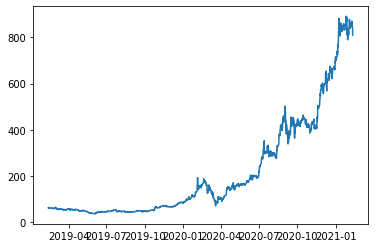

In [77]:
plt.plot(tsla)

In [ ]:
#Code for fixing datetime index in other notebooks or code
def add_hour(x):
    x = x.to_pydatetime() + dt.timedelta(hours=1)
    return pd.Timestamp(x)

tsla = tsla.reset_index()
while tsla.duplicated(subset='Date').any() == True:
    tsla_duplicated = tsla.duplicated(subset='Date')
    tsla.loc[tsla_duplicated,'Date'] = tsla[tsla_duplicated]['Date'].apply(add_hour)   
for i in range(10):
    tsla.loc[:,'Date'] = tsla[:]['Date'].apply(add_hour)    
tsla.set_index('Date',inplace=True)

# Google trends variables

In [95]:
tesla_trend_h = pickle.load(open('../data/GoogleTrend_tesla_hourly.pickle','rb')).drop(['isPartial'],axis=1)
tesla_trend_w = pickle.load(open('../data/GoogleTrend_tesla_weekly.pickle','rb')).drop(['isPartial'],axis=1)
tesla_trend_d = pickle.load(open('../data/GoogleTrend_tesla_daily.pickle','rb')).drop(['isPartial'],axis=1)

In [34]:
print(tesla_trend_d.head(23))

            tesla  isPartial
date                        
2020-02-24     96      False
2020-02-25     92      False
2020-02-26     91      False
2020-02-27     95      False
2020-02-28    100      False
2020-02-29     80      False
2020-03-01     74      False
2020-03-02     86      False
2020-03-03     93      False
2020-03-04     80      False
2020-03-05     82      False
2020-03-06     86      False
2020-03-07     75      False
2020-03-08     66      False
2020-03-09     98      False
2020-03-10     90      False
2020-03-11     81      False
2020-03-12     87      False
2020-03-13     84      False
2020-03-14     68      False
2020-03-15     61      False
2020-03-16     84      False
2020-03-17     80      False


### First we need to fix the hourly data that has a gap

In [42]:
with pd.option_context('display.max_rows', None):
    print(tesla_trend_h.loc['2020-02-24':'2020-03-17'])

                     tesla  isPartial
date                                 
2020-02-24 00:00:00     90      False
2020-02-24 01:00:00     96      False
2020-02-24 02:00:00     91      False
2020-02-24 03:00:00     80      False
2020-02-24 04:00:00     76      False
2020-02-24 05:00:00     69      False
2020-02-24 06:00:00     63      False
2020-02-24 07:00:00     64      False
2020-02-24 08:00:00     67      False
2020-02-24 09:00:00     69      False
2020-02-24 10:00:00     70      False
2020-02-24 11:00:00     74      False
2020-02-24 12:00:00      0      False
2020-02-24 13:00:00      0      False
2020-02-24 14:00:00      0      False
2020-02-24 15:00:00      0      False
2020-02-24 16:00:00      0      False
2020-02-24 17:00:00      0      False
2020-02-24 18:00:00      0      False
2020-02-24 19:00:00      0      False
2020-02-24 20:00:00      0      False
2020-02-24 21:00:00      0      False
2020-02-24 22:00:00      0      False
2020-02-24 23:00:00      0      False
2020-02-25 0

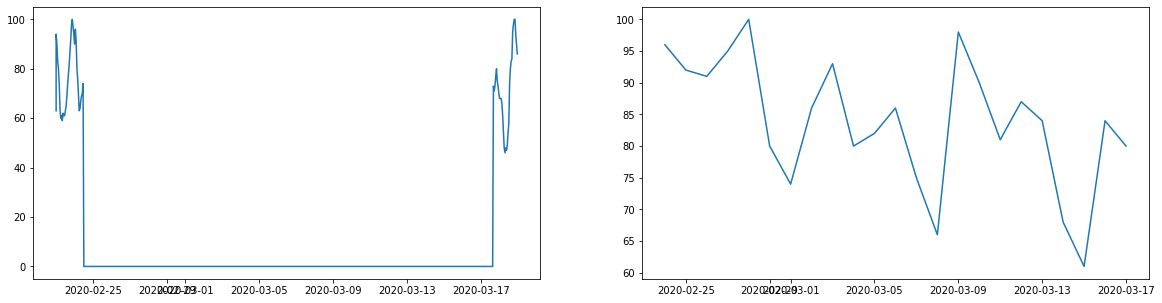

In [17]:
fig, axs = plt.subplots(1,2,figsize=(20,5))
axs[0].plot(tesla_trend_h['tesla']['2020-02-23':'2020-03-18'])
axs[1].plot(tesla_trend_d['tesla'])
plt.show()

In [19]:
print('hourly sum on 24th: ', sum(tesla_trend_h['tesla']['2020-02-24']))
print('hourly sum on 17th: ', sum(tesla_trend_h['tesla']['2020-03-17']))

hourly sum on 24th:  909
hourly sum on 17th:  592


Now we implant the daily values for the faulty hourly values

In [108]:
#for idx in tesla_trend_h['tesla']['2020-02-24T12':'2020-03-17T15'].index:
#    print(idx)
#    if tesla_trend_h['tesla'][idx] == 0:
#        print('old value: ',tesla_trend_h.at[idx,'tesla'])
#        print('new value: ',tesla_trend_d['tesla'][idx.floor('D')])

part1 = tesla_trend_h.loc[:'2020-02-24T11']
part3 = tesla_trend_h.loc['2020-03-17T16':]
part2 = pd.DataFrame(columns=['tesla'])

start_dt, end_dt = pd.to_datetime('2020-02-24T12'), pd.to_datetime('2020-03-17T15')
idx = start_dt
while idx <= end_dt:
    part2.loc[pd.Timestamp(idx)] = [tesla_trend_d['tesla'][pd.Timestamp(idx).floor('D')]]
    #if idx in tesla_trend_h.index:
    #    print('old : ', tesla_trend_h['tesla'][idx])
    #else:
    #    print('old : NaN')
    #print('new : ',tesla_trend_d['tesla'][pd.Timestamp(idx).floor('D')])
    idx = idx + dt.timedelta(hours=1)

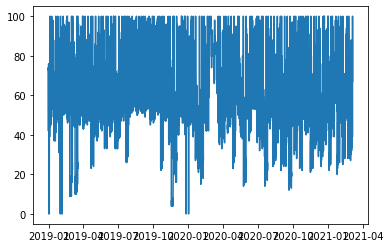

In [109]:
new_h = pd.concat([part1,part2,part3])
plt.plot(new_h)

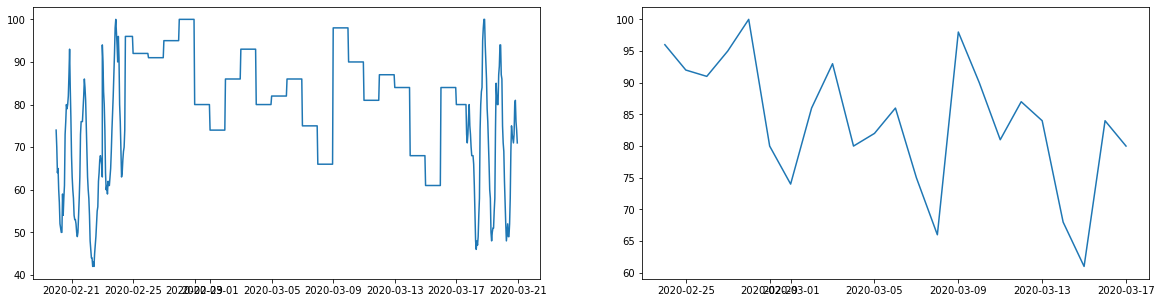

In [110]:
fig, axs = plt.subplots(1,2,figsize=(20,5))
axs[0].plot(new_h['tesla']['2020-02-20':'2020-03-20'])
axs[1].plot(tesla_trend_d['tesla'])
plt.show()

### Now we have to compose the hourly values, which is just an agreggation of the weekly hourly values, which the weekly values, in order to get true hourly search percentages over the entire time frame

We will do this by multiplying the hourly value with the weekly value.

In [100]:
tesla_trend_w = tesla_trend_w.div(100)
print(tesla_trend_w.head())

            tesla
date             
2016-03-20   0.17
2016-03-27   0.69
2016-04-03   0.47
2016-04-10   0.25
2016-04-17   0.21


In [111]:
new_h = new_h.div(100)

In [112]:
print(new_h.head())

                    tesla
2018-12-30 00:00:00  0.73
2018-12-30 01:00:00  0.74
2018-12-30 02:00:00  0.64
2018-12-30 03:00:00  0.65
2018-12-30 04:00:00  0.61


In [113]:
final_h = new_h.copy()
for h_idx in new_h.index:
    h_val = new_h['tesla'][h_idx]
    w_val = tesla_trend_w['tesla'][h_idx>=tesla_trend_w.index][-1]
    #print(w_val)
    final_h['tesla'][h_idx] = h_val*w_val*100

Let's check the if the new granular data seems coherent vs the less granular weekly data

                     tesla
2018-12-30 00:00:00  19.71
2018-12-30 01:00:00  19.98
2018-12-30 02:00:00  17.28
2018-12-30 03:00:00  17.55
2018-12-30 04:00:00  16.47
...                    ...
2021-03-05 20:00:00  46.98
2021-03-05 21:00:00  46.44
2021-03-05 22:00:00  42.12
2021-03-05 23:00:00  38.34
2021-03-06 00:00:00  36.18

[19239 rows x 1 columns]


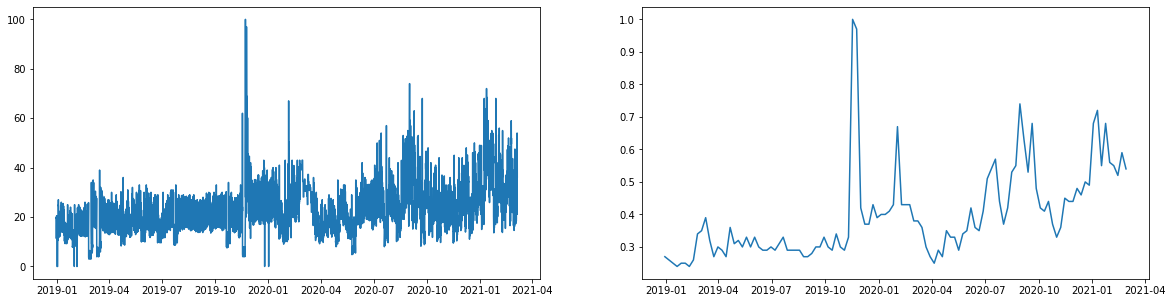

In [117]:
print(final_h)
fig, axs = plt.subplots(1,2,figsize=(20,5))

axs[0].plot(final_h['tesla'])
axs[1].plot(tesla_trend_w['tesla']['2018-12-30':'2021-03-06'])

Export the new series

In [118]:
file_path = '../data/GT_tesla_h.pickle'
if not os.path.isfile(file_path):
    pickle.dump(final_h,open(file_path,'wb'))

# Google trends "tsla"

In [120]:
tsla_trend_h = pickle.load(open('../data/GoogleTrend_tsla_hourly.pickle','rb')).drop(['isPartial'],axis=1)
tsla_trend_w = pickle.load(open('../data/GoogleTrend_tsla_weekly.pickle','rb')).drop(['isPartial'],axis=1)
tsla_trend_d = pickle.load(open('../data/GoogleTrend_tsla_daily.pickle','rb')).drop(['isPartial'],axis=1)

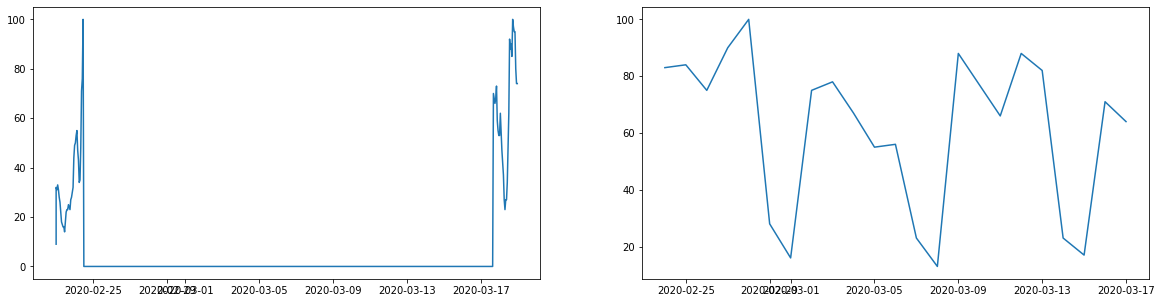

In [121]:
fig, axs = plt.subplots(1,2,figsize=(20,5))
axs[0].plot(tsla_trend_h['tsla']['2020-02-23':'2020-03-18'])
axs[1].plot(tsla_trend_d['tsla'])
plt.show()

In [122]:
part1 = tsla_trend_h.loc[:'2020-02-24T11']
part3 = tsla_trend_h.loc['2020-03-17T16':]
part2 = pd.DataFrame(columns=['tsla'])

start_dt, end_dt = pd.to_datetime('2020-02-24T12'), pd.to_datetime('2020-03-17T15')
idx = start_dt
while idx <= end_dt:
    part2.loc[pd.Timestamp(idx)] = [tsla_trend_d['tsla'][pd.Timestamp(idx).floor('D')]]
    idx = idx + dt.timedelta(hours=1)

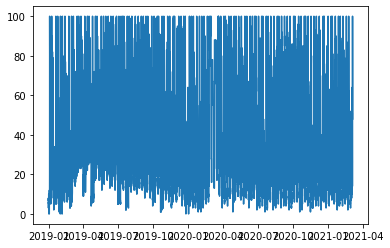

In [123]:
new_h = pd.concat([part1,part2,part3])
plt.plot(new_h)

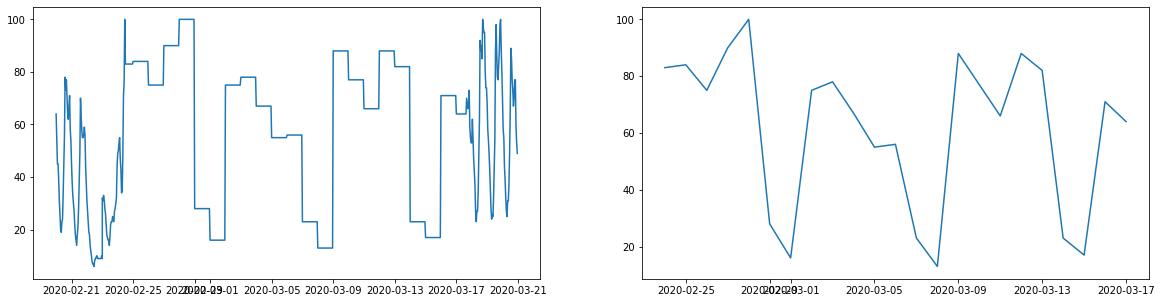

In [124]:
fig, axs = plt.subplots(1,2,figsize=(20,5))
axs[0].plot(new_h['tsla']['2020-02-20':'2020-03-20'])
axs[1].plot(tsla_trend_d['tsla'])
plt.show()

In [125]:
tsla_trend_w = tsla_trend_w.div(100)
print(tsla_trend_w.head())

            tsla
date            
2016-03-27  0.13
2016-04-03  0.14
2016-04-10  0.07
2016-04-17  0.05
2016-04-24  0.05


In [126]:
new_h = new_h.div(100)
print(new_h.head())

                     tsla
2018-12-30 00:00:00  0.07
2018-12-30 01:00:00  0.08
2018-12-30 02:00:00  0.07
2018-12-30 03:00:00  0.07
2018-12-30 04:00:00  0.08


In [127]:
final_h = new_h.copy()
for h_idx in new_h.index:
    h_val = new_h['tsla'][h_idx]
    w_val = tsla_trend_w['tsla'][h_idx>=tsla_trend_w.index][-1]
    #print(w_val)
    final_h['tsla'][h_idx] = h_val*w_val*100

                      tsla
2018-12-30 00:00:00   0.77
2018-12-30 01:00:00   0.88
2018-12-30 02:00:00   0.77
2018-12-30 03:00:00   0.77
2018-12-30 04:00:00   0.88
...                    ...
2021-03-05 20:00:00  38.76
2021-03-05 21:00:00  36.21
2021-03-05 22:00:00   30.6
2021-03-05 23:00:00  28.05
2021-03-06 00:00:00  24.48

[19239 rows x 1 columns]


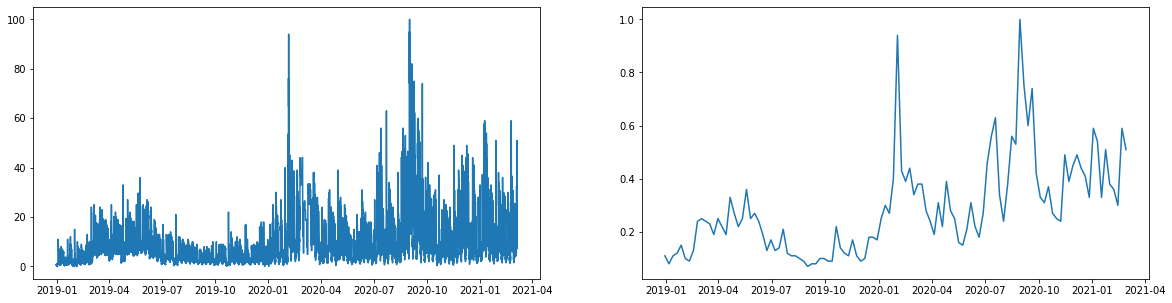

In [128]:
print(final_h)
fig, axs = plt.subplots(1,2,figsize=(20,5))

axs[0].plot(final_h['tsla'])
axs[1].plot(tsla_trend_w['tsla']['2018-12-30':'2021-03-06'])

In [129]:
file_path = '../data/GT_tsla_h.pickle'
if not os.path.isfile(file_path):
    pickle.dump(final_h,open(file_path,'wb'))

# Google Trends "musk"

In [130]:
musk_trend_h = pickle.load(open('../data/GoogleTrend_musk_hourly.pickle','rb')).drop(['isPartial'],axis=1)
musk_trend_w = pickle.load(open('../data/GoogleTrend_musk_weekly.pickle','rb')).drop(['isPartial'],axis=1)
musk_trend_d = pickle.load(open('../data/GoogleTrend_musk_daily.pickle','rb')).drop(['isPartial'],axis=1)

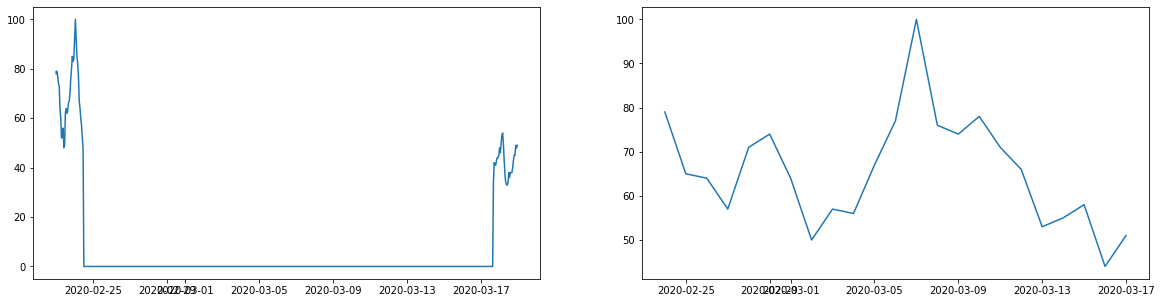

In [131]:
fig, axs = plt.subplots(1,2,figsize=(20,5))
axs[0].plot(musk_trend_h['musk']['2020-02-23':'2020-03-18'])
axs[1].plot(musk_trend_d['musk'])
plt.show()

In [133]:
part1 = musk_trend_h.loc[:'2020-02-24T11']
part3 = musk_trend_h.loc['2020-03-17T16':]
part2 = pd.DataFrame(columns=['musk'])

start_dt, end_dt = pd.to_datetime('2020-02-24T12'), pd.to_datetime('2020-03-17T15')
idx = start_dt
while idx <= end_dt:
    part2.loc[pd.Timestamp(idx)] = [musk_trend_d['musk'][pd.Timestamp(idx).floor('D')]]
    idx = idx + dt.timedelta(hours=1)

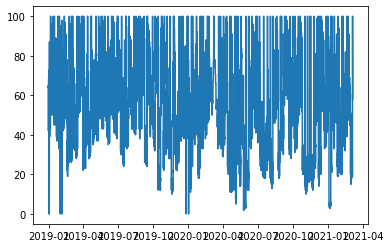

In [134]:
new_h = pd.concat([part1,part2,part3])
plt.plot(new_h)

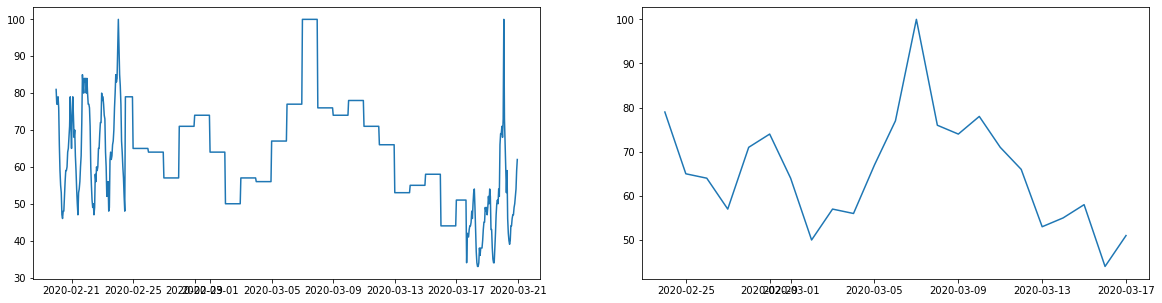

In [135]:
fig, axs = plt.subplots(1,2,figsize=(20,5))
axs[0].plot(new_h['musk']['2020-02-20':'2020-03-20'])
axs[1].plot(musk_trend_d['musk'])
plt.show()

In [136]:
musk_trend_w = musk_trend_w.div(100)
print(musk_trend_w.head())

            musk
date            
2016-03-27  0.05
2016-04-03  0.06
2016-04-10  0.04
2016-04-17  0.04
2016-04-24  0.04


In [137]:
new_h = new_h.div(100)
print(new_h.head())

                     musk
2018-12-30 00:00:00  0.64
2018-12-30 01:00:00   0.6
2018-12-30 02:00:00  0.62
2018-12-30 03:00:00  0.65
2018-12-30 04:00:00   0.6


In [139]:
final_h = new_h.copy()
for h_idx in new_h.index:
    h_val = new_h['musk'][h_idx]
    w_val = musk_trend_w['musk'][h_idx>=musk_trend_w.index][-1]
    #print(w_val)
    final_h['musk'][h_idx] = h_val*w_val*100

                      musk
2018-12-30 00:00:00   5.12
2018-12-30 01:00:00    4.8
2018-12-30 02:00:00   4.96
2018-12-30 03:00:00    5.2
2018-12-30 04:00:00    4.8
...                    ...
2021-03-05 20:00:00  16.72
2021-03-05 21:00:00  17.38
2021-03-05 22:00:00  18.26
2021-03-05 23:00:00  15.84
2021-03-06 00:00:00  12.76

[19239 rows x 1 columns]


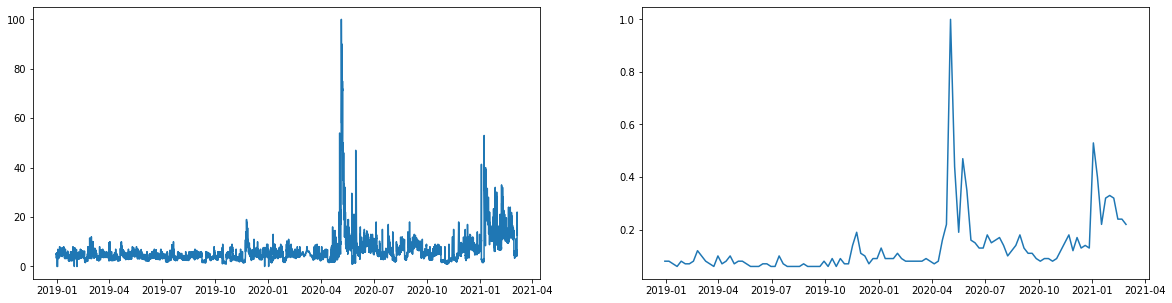

In [140]:
print(final_h)
fig, axs = plt.subplots(1,2,figsize=(20,5))

axs[0].plot(final_h['musk'])
axs[1].plot(musk_trend_w['musk']['2018-12-30':'2021-03-06'])

In [141]:
file_path = '../data/GT_musk_h.pickle'
if not os.path.isfile(file_path):
    pickle.dump(final_h,open(file_path,'wb'))

# Google Trends "tesla stock"

In [142]:
ts_trend_h = pickle.load(open('../data/GoogleTrend_tesla_stock_hourly.pickle','rb')).drop(['isPartial'],axis=1)
ts_trend_w = pickle.load(open('../data/GoogleTrend_tesla_stock_weekly.pickle','rb')).drop(['isPartial'],axis=1)
ts_trend_d = pickle.load(open('../data/GoogleTrend_tesla_stock_daily.pickle','rb')).drop(['isPartial'],axis=1)

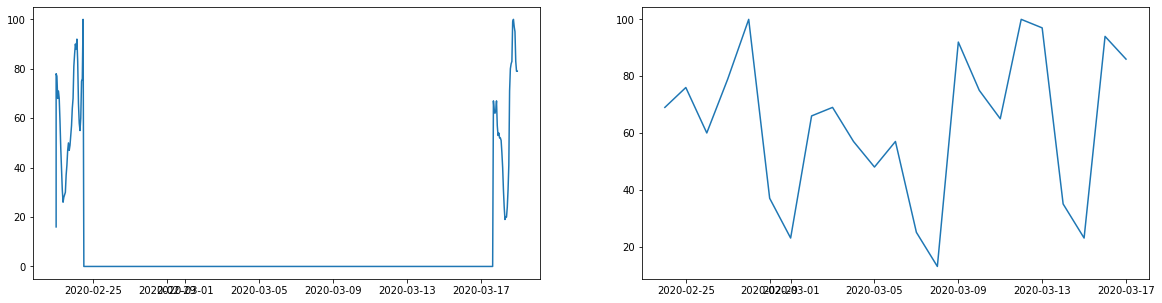

In [143]:
fig, axs = plt.subplots(1,2,figsize=(20,5))
axs[0].plot(ts_trend_h['tesla stock']['2020-02-23':'2020-03-18'])
axs[1].plot(ts_trend_d['tesla stock'])
plt.show()

In [144]:
part1 = ts_trend_h.loc[:'2020-02-24T11']
part3 = ts_trend_h.loc['2020-03-17T16':]
part2 = pd.DataFrame(columns=['tesla stock'])

start_dt, end_dt = pd.to_datetime('2020-02-24T12'), pd.to_datetime('2020-03-17T15')
idx = start_dt
while idx <= end_dt:
    part2.loc[pd.Timestamp(idx)] = [ts_trend_d['tesla stock'][pd.Timestamp(idx).floor('D')]]
    idx = idx + dt.timedelta(hours=1)

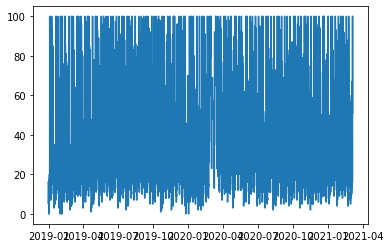

In [145]:
new_h = pd.concat([part1,part2,part3])
plt.plot(new_h)

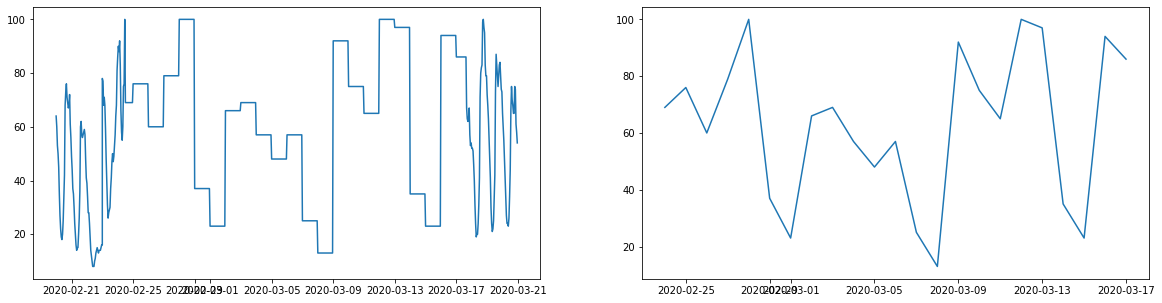

In [146]:
fig, axs = plt.subplots(1,2,figsize=(20,5))
axs[0].plot(new_h['tesla stock']['2020-02-20':'2020-03-20'])
axs[1].plot(ts_trend_d['tesla stock'])
plt.show()

In [147]:
ts_trend_w = ts_trend_w.div(100)
print(ts_trend_w.head())

            tesla stock
date                   
2016-03-27         0.07
2016-04-03         0.07
2016-04-10         0.03
2016-04-17         0.03
2016-04-24         0.02


In [148]:
new_h = new_h.div(100)
print(new_h.head())

                    tesla stock
2018-12-30 00:00:00        0.16
2018-12-30 01:00:00        0.16
2018-12-30 02:00:00        0.13
2018-12-30 03:00:00        0.14
2018-12-30 04:00:00        0.14


In [149]:
final_h = new_h.copy()
for h_idx in new_h.index:
    h_val = new_h['tesla stock'][h_idx]
    w_val = ts_trend_w['tesla stock'][h_idx>=ts_trend_w.index][-1]
    #print(w_val)
    final_h['tesla stock'][h_idx] = h_val*w_val*100

                    tesla stock
2018-12-30 00:00:00         0.8
2018-12-30 01:00:00         0.8
2018-12-30 02:00:00        0.65
2018-12-30 03:00:00         0.7
2018-12-30 04:00:00         0.7
...                         ...
2021-03-05 20:00:00       38.22
2021-03-05 21:00:00       36.26
2021-03-05 22:00:00       30.38
2021-03-05 23:00:00       27.44
2021-03-06 00:00:00       24.99

[19239 rows x 1 columns]


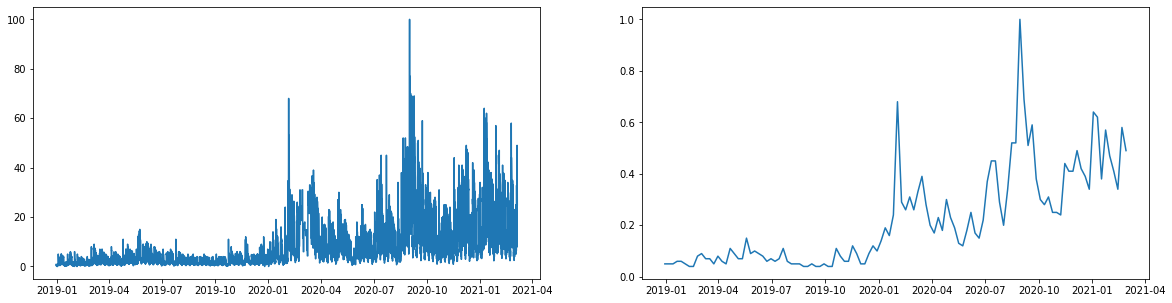

In [150]:
print(final_h)
fig, axs = plt.subplots(1,2,figsize=(20,5))

axs[0].plot(final_h['tesla stock'])
axs[1].plot(ts_trend_w['tesla stock']['2018-12-30':'2021-03-06'])

In [151]:
file_path = '../data/GT_tesla_stock_h.pickle'
if not os.path.isfile(file_path):
    pickle.dump(final_h,open(file_path,'wb'))

# USD inflation data

Could the stock price increase be partly or exclusevly due to inflation ?

In [5]:
infl = pd.read_csv("../data/T10YIE.csv")
print(infl)

            DATE T10YIE
0     2008-07-25   2.34
1     2008-07-28   2.36
2     2008-07-29   2.33
3     2008-07-30   2.36
4     2008-07-31   2.34
...          ...    ...
3293  2021-03-10   2.26
3294  2021-03-11   2.28
3295  2021-03-12   2.26
3296  2021-03-15   2.27
3297  2021-03-16    2.3

[3298 rows x 2 columns]


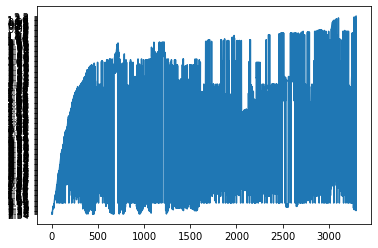

In [8]:
plt.plot(infl['T10YIE'])